Aim- A University Announced Its On-Campus Placement Records For The Engineering Course. The Data Is From
The Years 2013 And 2014. The Following Is The College Placements Data Compiled Over 2 years. Use This
Data To Predict And Analyse Whether A Student Gets Placed, Based On His/Her Background.
Perform Extensive EDAs And Bring Out Insights. Build A Robust Model Using Machine Learning
Techniques.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('collegePlace.csv')

In [5]:
df.shape

(2966, 8)

In [6]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [7]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [8]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [9]:
df.nunique()

Age                  11
Gender                2
Stream                6
Internships           4
CGPA                  5
Hostel                2
HistoryOfBacklogs     2
PlacedOrNot           2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [11]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

No null values in the dataset.

Target variable- PlacedorNot

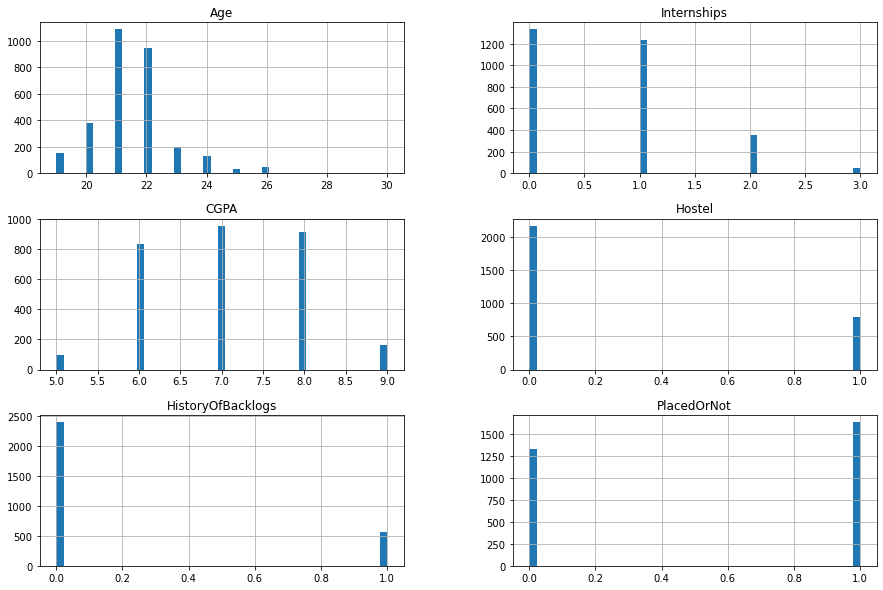

In [12]:
df.hist(bins = 45, figsize = (15,10))
plt.show()

<AxesSubplot:xlabel='CGPA', ylabel='count'>

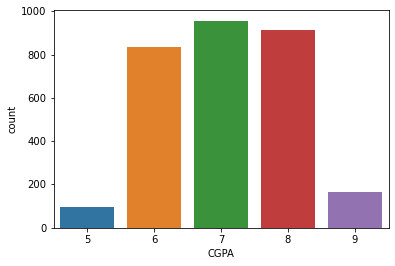

In [13]:
sns.countplot(x='CGPA',data=df)

Most students' GPA lies between 6-8

People aged more than 28 very likely to get placed.

<AxesSubplot:xlabel='Age', ylabel='count'>

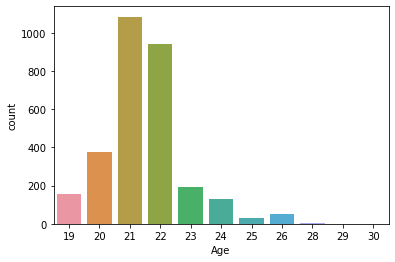

In [14]:
sns.countplot(x='Age',data=df)

<AxesSubplot:xlabel='Stream', ylabel='count'>

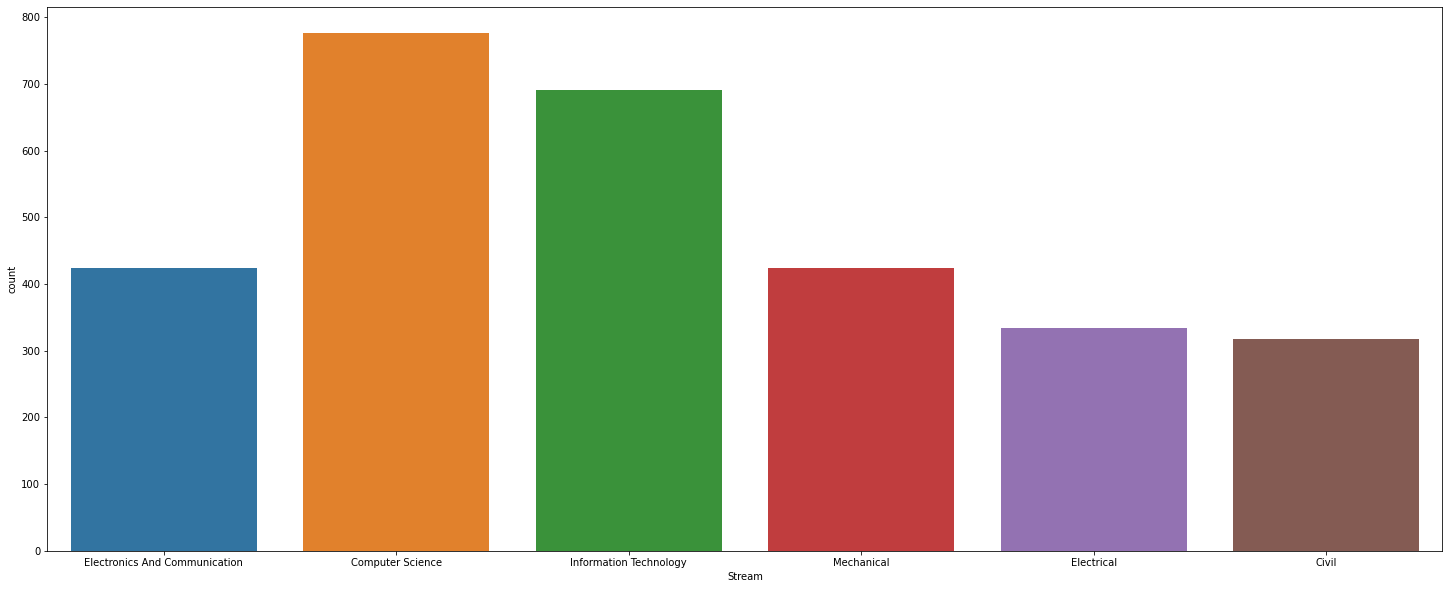

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x='Stream',data=df)

Most number of students in the collenge belong to CSE and IT stream. Least number of students are in Civil dpartment.

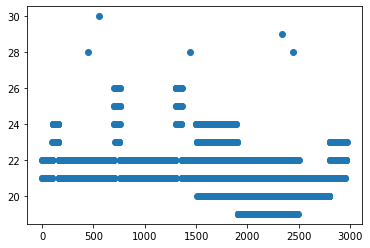

In [21]:
plt.scatter(df.index,df['Age'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

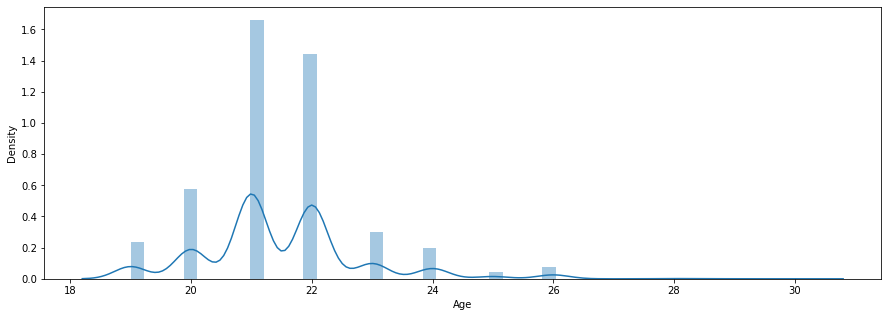

In [22]:
plt.figure(figsize =(15, 5))
sns.distplot(df['Age'])

Most of the students belong to the age group 19-23

Text(0.5, 0, 'CGPA')

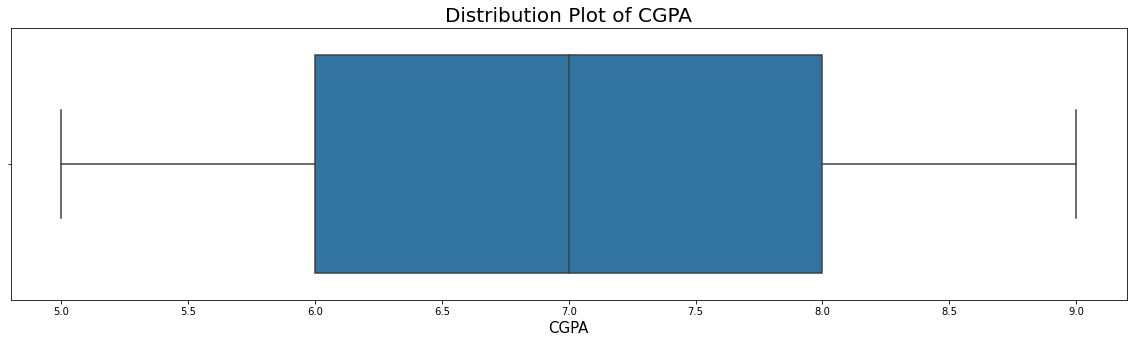

In [24]:
plt.figure(figsize = (20,5))
sns.boxplot(df['CGPA'])
plt.title('Distribution Plot of CGPA', fontsize = 20)
plt.xlabel('CGPA', fontsize = 15)

Text(0.5, 0, 'CGPA')

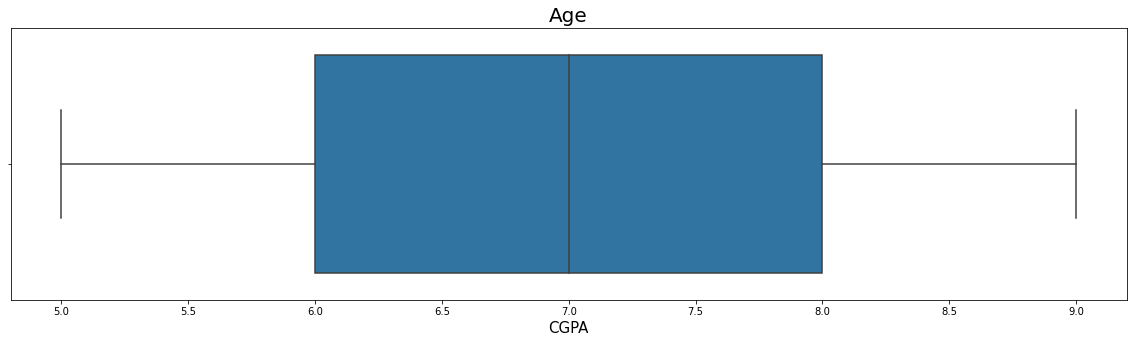

In [25]:
plt.figure(figsize = (20,5))
sns.boxplot(df['CGPA'])
plt.title('Age', fontsize = 20)
plt.xlabel('CGPA', fontsize = 15)

<AxesSubplot:xlabel='Stream', ylabel='count'>

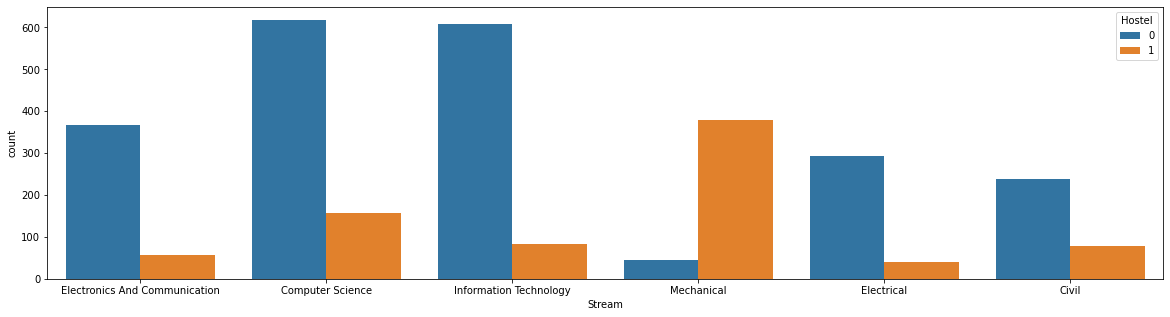

In [31]:
plt.figure(figsize = (20,5))
sns.countplot(x='Stream',hue="Hostel",data=df)

Most of the Mechanical students preferred hostel than students of other departments.

<AxesSubplot:xlabel='Age', ylabel='count'>

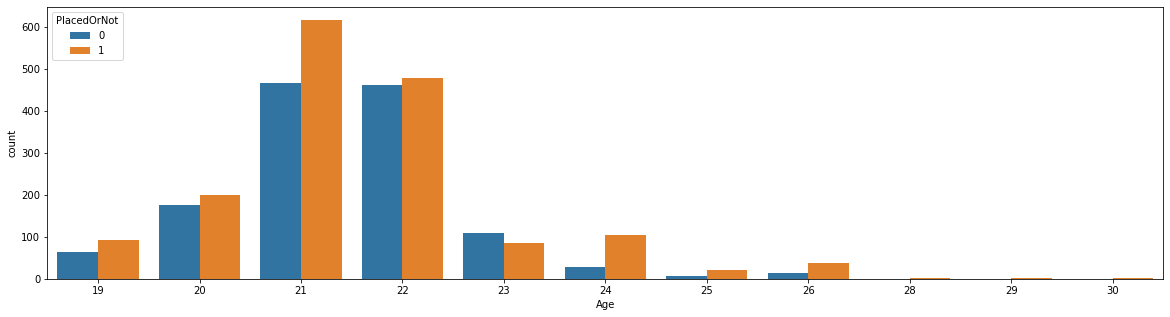

In [34]:
plt.figure(figsize = (20,5))
sns.countplot(x='Age',hue="PlacedOrNot",data=df)

Placed students>Not placed students for all age groups.

<AxesSubplot:xlabel='Stream', ylabel='count'>

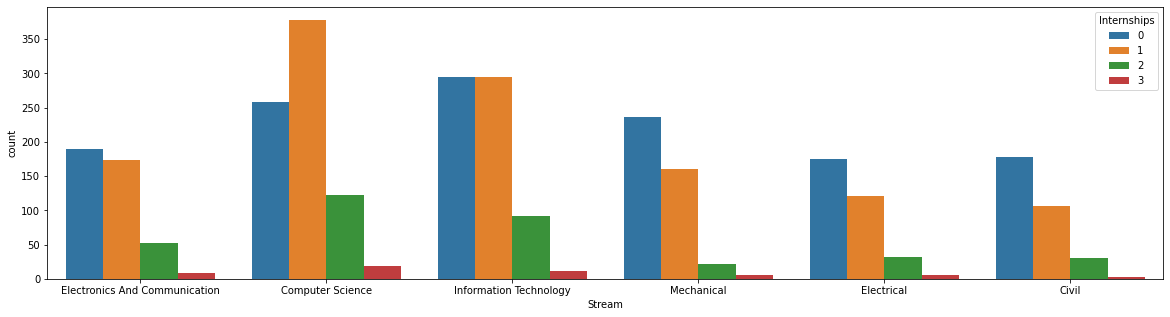

In [38]:
plt.figure(figsize = (20, 5))
sns.countplot(x='Stream',hue="Internships",data=df)

CSE students did the most number of internships.

In [50]:
import plotly.express as px
fig=px.pie(df,values='Age',names='Stream',title='Age wrt Stream')
fig.show()

Almost 50% of students belong to CSE and IT department.

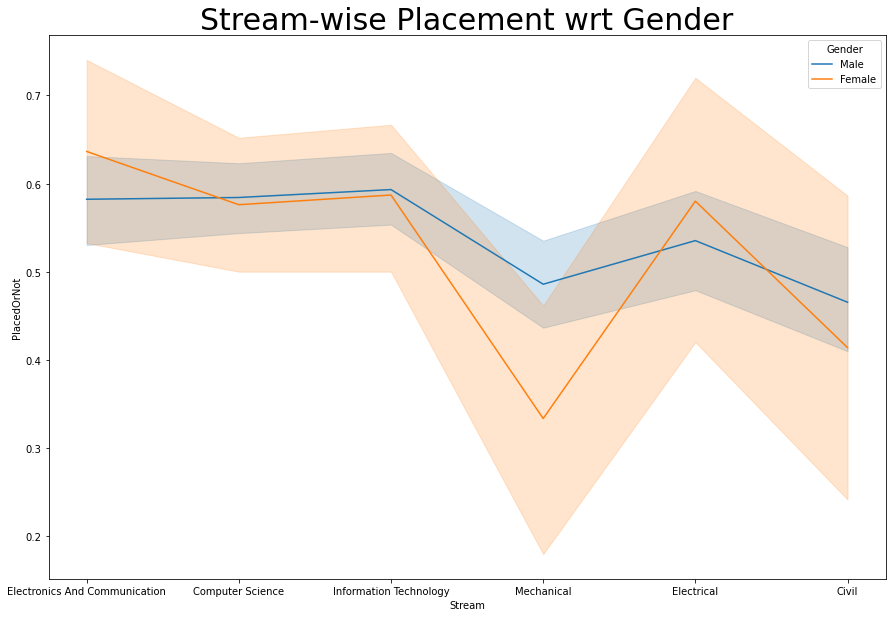

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Stream'],y=df['PlacedOrNot'],hue=df['Gender'])
plt.title('Stream-wise Placement wrt Gender',fontsize='30')
plt.show()

1. Female students least likley to get placed in Mechanical department but most likely to get placed in ECE and Electrical.
2. Male students least likely to get placed in Mech but msot likely to get placed in IT and CSE.

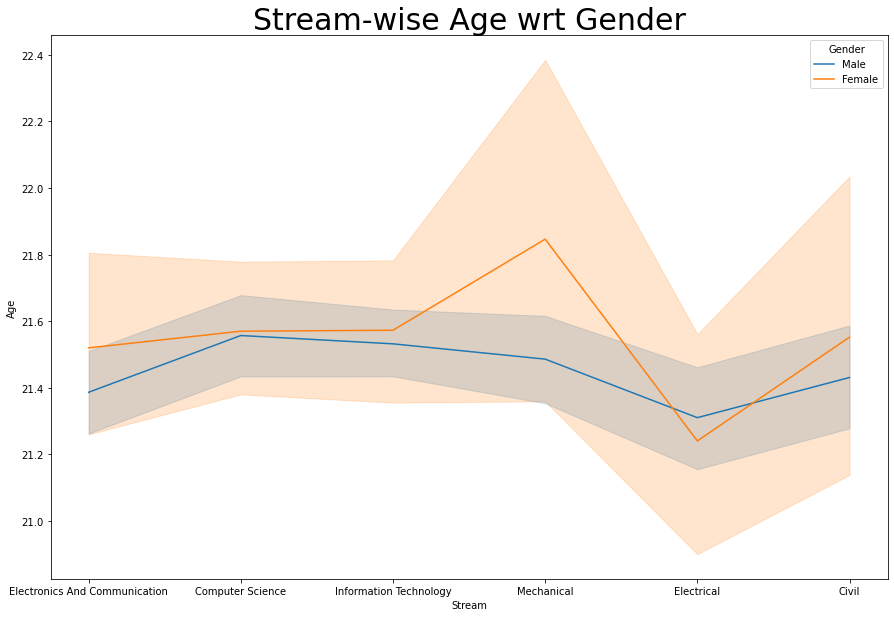

In [59]:
plt.figure(figsize=(15,10))
sns.lineplot(x=df['Stream'],y=df['Age'],hue=df['Gender'])
plt.title('Stream-wise Age wrt Gender',fontsize='30')
plt.show()

Most older women in Mech and most younger women in Electrical.

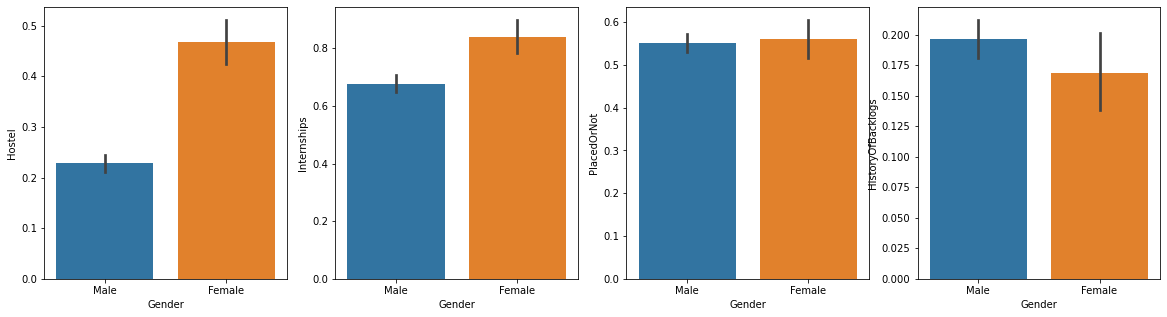

In [54]:
fig,axes=plt.subplots(1,4,figsize=(20,5))
sns.barplot(ax=axes[0],x=df['Gender'],y=df['Hostel'])
sns.barplot(ax=axes[1],x=df['Gender'],y=df['Internships'])
sns.barplot(ax=axes[2],x=df['Gender'],y=df['PlacedOrNot'])
sns.barplot(ax=axes[3],x=df['Gender'],y=df['HistoryOfBacklogs'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

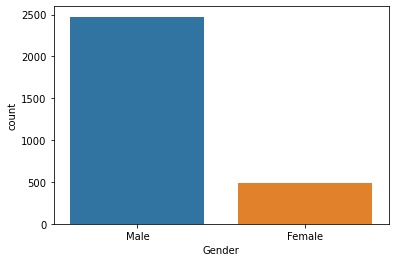

In [55]:
sns.countplot(x='Gender',data=df)

Most female students prefer hostel.
Female students very less as compared to male students.
Feamles do internships more than males.

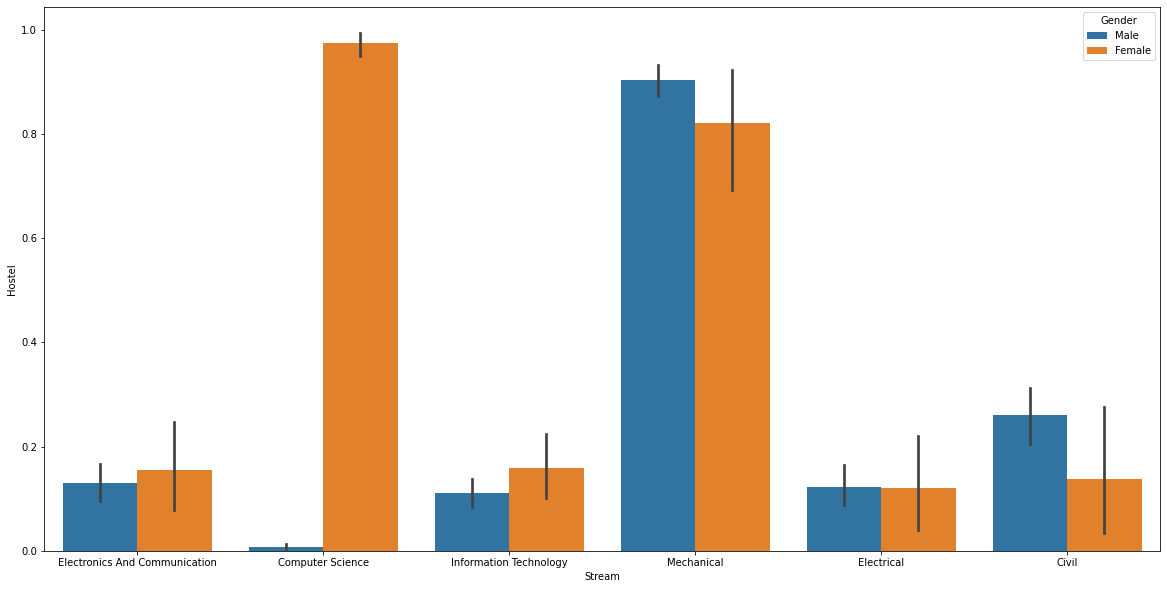

In [58]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Stream'],y=df['Hostel'],hue='Gender',data=df)
plt.show()

Females that belong to CSE department most likely to prefer hostels. 
Males that belong to CSE department least likely to prefer hostels.

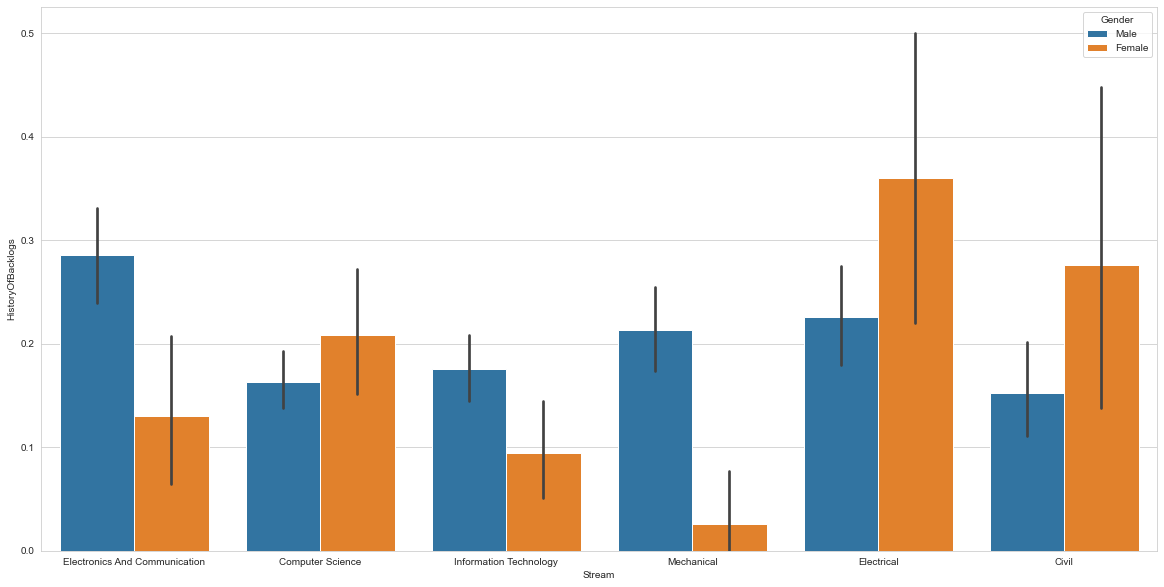

In [136]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Stream'],y=df['HistoryOfBacklogs'],hue='Gender',data=df)
plt.show()

Text(0.5, 1.0, 'Distribution Plot of Age with Placement')

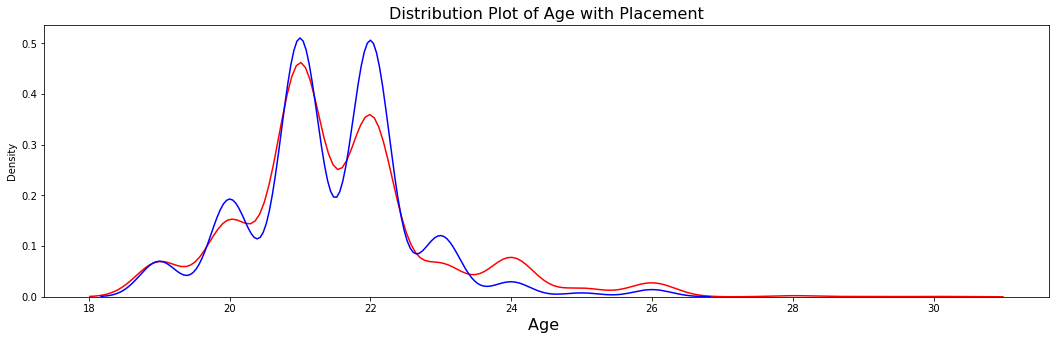

In [68]:
plt.figure(figsize = (18,5))
sns.distplot(df['Age'][df['PlacedOrNot'] == 1], hist = False, color = 'red')
sns.distplot(df['Age'][df['PlacedOrNot'] == 0], hist = False, color = 'blue')
plt.xlabel('Age ', fontsize = 16)
plt.title('Distribution Plot of Age with Placement', fontsize = 16)

People older than 24 are least likely to get placed.

<AxesSubplot:xlabel='Stream', ylabel='HistoryOfBacklogs'>

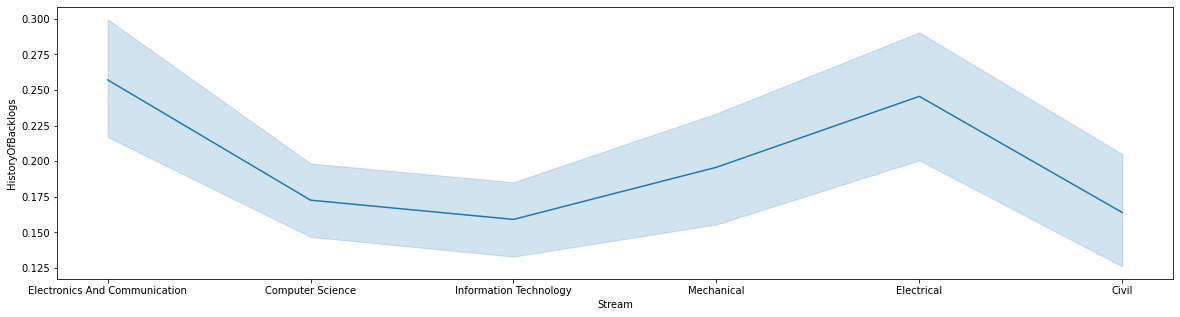

In [73]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Stream',y='HistoryOfBacklogs',data=df)

CSE and IT students least likley to have backlogs.

In [66]:
df.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


<AxesSubplot:>

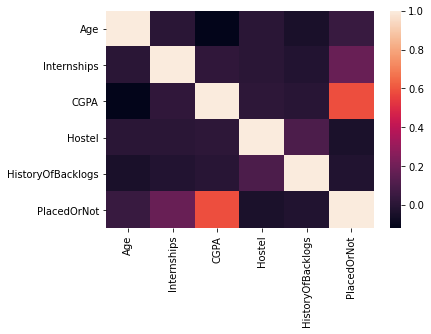

In [67]:
sns.heatmap(df.corr())

# Separating data into numerical and categorical values

In [77]:
Data_num = df.select_dtypes(include=[np.number]).copy()
Data_num.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1,1
1,21,0,7,1,1,1
2,22,1,6,0,0,1
3,21,0,8,0,1,1
4,22,0,8,1,0,1


In [79]:
Data_char = df.select_dtypes(include='object').copy()
Data_char.head()

,Gender,Stream
0,Male,Electronics And Communication
1,Female,Computer Science
2,Female,Information Technology
3,Male,Information Technology
4,Male,Mechanical


In [80]:
Data_dummy = pd.get_dummies(Data_char)
Data_dummy.head()

,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1


In [81]:
Data_combined = pd.concat([Data_num,Data_dummy], axis=1)
Data_combined.head()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male,Stream_Civil,Stream_Computer Science,Stream_Electrical,Stream_Electronics And Communication,Stream_Information Technology,Stream_Mechanical
0,22,1,8,1,1,1,0,1,0,0,0,1,0,0
1,21,0,7,1,1,1,1,0,0,1,0,0,0,0
2,22,1,6,0,0,1,1,0,0,0,0,0,1,0
3,21,0,8,0,1,1,0,1,0,0,0,0,1,0
4,22,0,8,1,0,1,0,1,0,0,0,0,0,1


# PreProcessing Dataset

In [83]:
x = Data_combined.drop(columns=['PlacedOrNot'])
y = Data_combined[['PlacedOrNot']]

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 100)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [86]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.7679856115107914
Testing accuracy  : 0.7452830188679245


[[237 111]
 [ 78 316]]


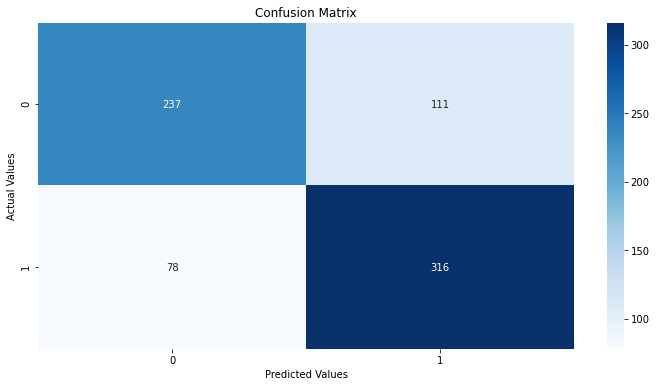

In [87]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [88]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       979
           1       0.78      0.81      0.80      1245

    accuracy                           0.77      2224
   macro avg       0.77      0.76      0.76      2224
weighted avg       0.77      0.77      0.77      2224



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.75      0.68      0.71       348
           1       0.74      0.80      0.77       394

    accuracy                           0.75       742
   macro avg       0.75      0.74      0.74       742
weighted avg       0.75      0.75      0.74       742



In [89]:
from sklearn import metrics
print('Error rate for Train Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_train, y_pred_train))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

print('\n')
print('Error rate for Test Data is : \n',)
print('Mean Square Error (MSE)       :', metrics.mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error           :', metrics.mean_absolute_error(y_test, y_pred_test))
print('Root mean Square Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Error rate for Train Data is : 

Mean Square Error (MSE)       : 0.23201438848920863
Mean Absolute Error           : 0.23201438848920863
Root mean Square Error (RMSE) : 0.4816787191574988


Error rate for Test Data is : 

Mean Square Error (MSE)       : 0.25471698113207547
Mean Absolute Error           : 0.25471698113207547
Root mean Square Error (RMSE) : 0.5046949386828399


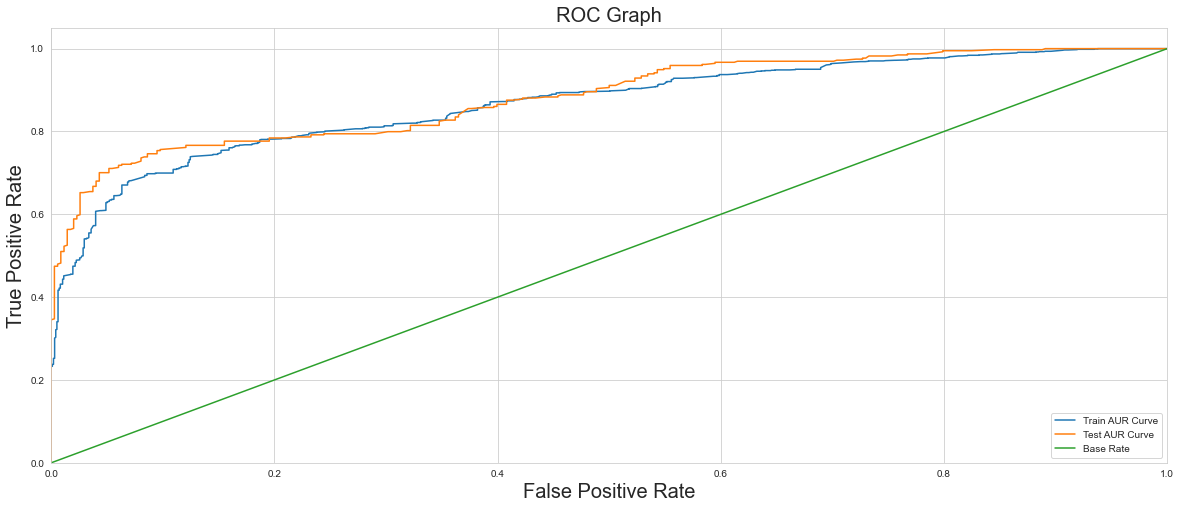

In [90]:
from sklearn.metrics import roc_curve
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, lr.predict_proba(x_train)[:,1])
fpr_series = pd.Series(FPR_lr_train)
tpr_series = pd.Series(TPR_lr_train)
thresholds_series = pd.Series(Thresholds_train)

FPR_lr_test, TPR_lr_test, Thresholds_test = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
fpr_series = pd.Series(FPR_lr_test)
tpr_series = pd.Series(TPR_lr_test)
thresholds_series = pd.Series(Thresholds_test)

from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))

plt.plot(FPR_lr_train, TPR_lr_train, label = 'Train AUR Curve')
plt.plot(FPR_lr_test, TPR_lr_test,   label = 'Test AUR Curve')


# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

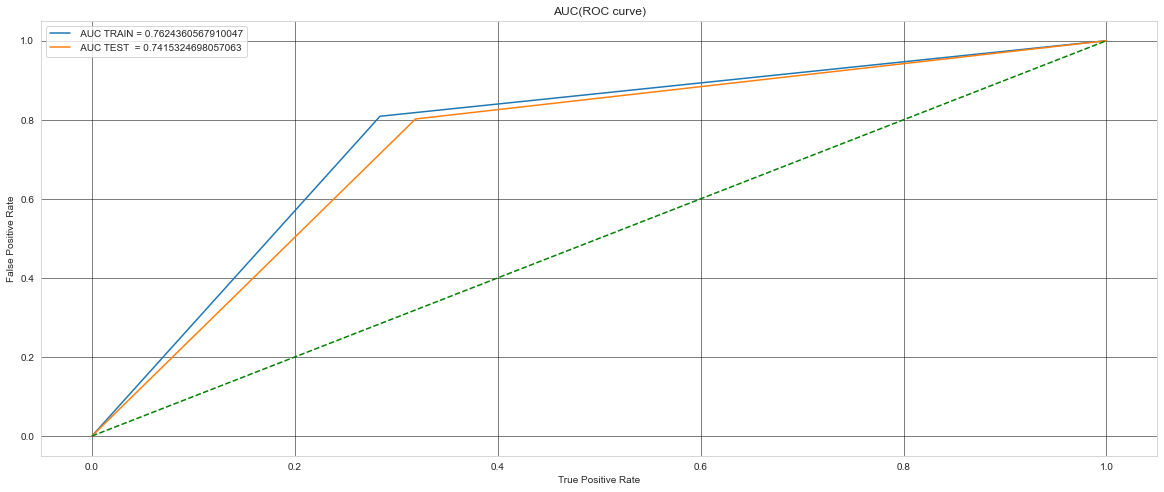

In [91]:
from sklearn.metrics import auc
FPR_lr_train, TPR_lr_train, Thresholds_train = roc_curve(y_train, y_pred_train)
FPR_lr_test, TPR_lr_test, Thresholds_test    = roc_curve(y_test, y_pred_test)

plt.figure(figsize = (20,8))
plt.grid()
plt.plot(FPR_lr_train, TPR_lr_train, label = " AUC TRAIN = "+str(auc(FPR_lr_train, TPR_lr_train)))
plt.plot(FPR_lr_test, TPR_lr_test,   label = " AUC TEST  = "+str(auc(FPR_lr_test, TPR_lr_test)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color = 'black', linestyle = '-', linewidth = 0.5)
plt.show()

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 0.9262589928057554
Testing accuracy  : 0.876010781671159


In [96]:
cm_test = confusion_matrix(y_test, y_pred_dtc_test)
print(cm_test)

[[312  36]
 [ 56 338]]


# Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 0.9262589928057554
Testing accuracy  : 0.871967654986523


In [99]:
cm_test = confusion_matrix(y_test, y_pred_rfc_test)
print(cm_test)

[[309  39]
 [ 56 338]]


# SVM

In [100]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [101]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.7756294964028777
Testing accuracy  : 0.7681940700808625


# KNN

In [127]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,30):
        neigh = KNeighborsClassifier(n_neighbors = i)

In [128]:
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [129]:
y_pred_knn_train = neigh.predict(x_train)
y_pred_knn_test  = neigh.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_knn_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_knn_test, y_test))

Train Accuracy :  0.8705035971223022
Test Accuracy  :  0.866576819407008


# Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
 
y_pred_gnb_train = clf.predict(x_train)
y_pred_gnb_test  = clf.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_gnb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_gnb_test, y_test))

Train Accuracy :  0.789568345323741
Test Accuracy  :  0.7857142857142857


# XGBoost Classifier

In [131]:
from xgboost import XGBClassifier
gbm = XGBClassifier()
gbm.fit(x_train, y_train)

[00:37:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
y_pred_xgb_train = gbm.predict(x_train)
y_pred_xgb_test  = gbm.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_xgb_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_xgb_test, y_test))

Train Accuracy :  0.9190647482014388
Test Accuracy  :  0.8814016172506739


# AdaBoost Classifier

In [133]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()
adc.fit(x_train, y_train)

AdaBoostClassifier()

In [134]:
y_pred_abc_train = adc.predict(x_train)
y_pred_abc_test  = adc.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_abc_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_abc_test, y_test))

Train Accuracy :  0.8669064748201439
Test Accuracy  :  0.8881401617250674


# Conclusion

1. Male population exceeds the female population by a large gap.
2. Most number of students are average and their GPA lie betwen 6-8.
3. Almost 50% of the students belong to CSE and IT departments.
4. Females in Mechanical department are comparitively older and least likely to get placed.
5. Females do well in ECE and EE departments.
7. Males do well in IT nd CSE departments.
8. Females prefer hostels more than males, especially those who belong to CSE department.
9. Females in Eletrical have the most number of backlogs yet most likely to get placed which is in contrast to the females in Mech department.
10. CSE and IT students do the most number of internships and do not have backlogs.
